In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### DataPrep

In [232]:
df = pd.read_csv(r"C:\Users\efvs\Documents\Residencia Ednael\Dados licitações\Licitação\lic_com_tag.csv")

In [233]:
df.rename({'Data Resultado Compra':'data'},axis=1,inplace=True)

In [234]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Número Licitação', 'Código UG',
       'Nome UG', 'Código Modalidade Compra', 'Modalidade Compra',
       'Número Processo', 'Objeto', 'Situação Licitação',
       'Código Órgão Superior', 'Nome Órgão Superior', 'Código Órgão',
       'Nome Órgão', 'Município', 'data', 'Data Abertura', 'Total', 'Tipo',
       'Tag'],
      dtype='object')

In [235]:
df.drop(['Unnamed: 0','Nome UG','Modalidade Compra','Situação Licitação','Nome Órgão Superior','Nome Órgão',
        'Município','Data Abertura'],axis=1,inplace=True)

In [236]:
od = OrdinalEncoder()

In [237]:
enc = LabelEncoder()
enc2 = LabelEncoder()
enc3 = LabelEncoder()

In [240]:
df['Objeto'] = enc.fit_transform(df['Objeto'])
df['Número Processo'] = enc2.fit_transform(df['Número Processo'])
df['Tipo'] = enc2.fit_transform(df['Tipo'])

In [241]:
aa = np.array(df['data'])
aa=aa.reshape(-1,1)
df['data'] = od.fit_transform(aa)

In [243]:
norm = MinMaxScaler()
bb = np.array(df['Total'])
bb = bb.reshape(-1,1)
df['Total'] = norm.fit_transform(bb)

### Elbow Method

In [244]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

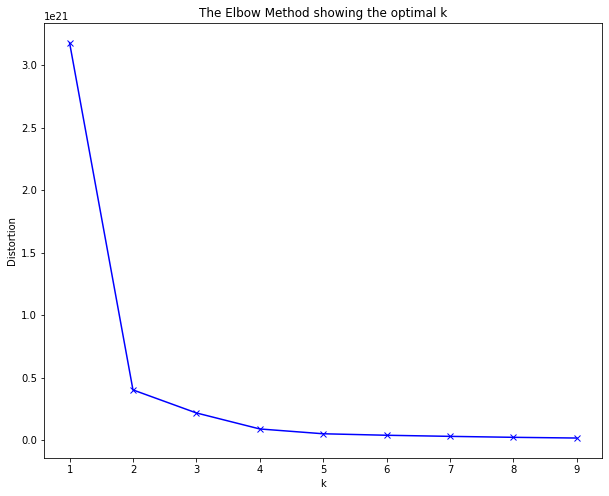

In [245]:
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [246]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [247]:
predictions = kmeans.predict(df)
centers=kmeans.cluster_centers_

In [248]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [249]:
centers

array([[ 6.94769101e+04,  1.25749879e+06,  2.77359693e+05,
        -7.80933344e+00,  2.13490812e+05,  2.08992362e+05,
         4.13702760e+04,  4.14399096e+04,  5.43656891e+02,
         3.22848291e-06,  3.08228329e-02,  8.09606864e-01],
       [ 7.76790407e+04,  5.47973347e+08,  2.51648317e+05,
         5.28232858e+00,  1.71558193e+05,  2.13747123e+05,
         3.11305108e+04,  3.21680808e+04,  5.25398527e+02,
         7.49198457e-08,  8.74367234e-03,  9.16935113e-01],
       [ 8.00315974e+04,  8.34946100e+08,  3.22822968e+05,
        -1.87621462e+00,  2.10415784e+05,  2.00887821e+05,
         3.16392057e+04,  3.94298597e+04,  5.33640473e+02,
         8.85721690e-08,  5.91465991e-03,  8.68187579e-01],
       [ 7.64205290e+04,  2.59748676e+08,  3.76768687e+05,
        -1.28930595e+00,  1.67180170e+05,  2.40299487e+05,
         3.98843336e+04,  4.29076586e+04,  5.32375354e+02,
         4.78020838e-08,  2.12464589e-02,  8.92705382e-01],
       [ 8.27301291e+04,  9.16343729e+07,  3.7051185

In [250]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(df)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

KMeans(n_clusters=4, n_init=4)

In [251]:
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

In [252]:
x_min

-12829187.1833512

In [253]:
len(np.arange(x_min, x_max, 10000))

99999

In [254]:
reduced_data = PCA(n_components=2).fit_transform(df)

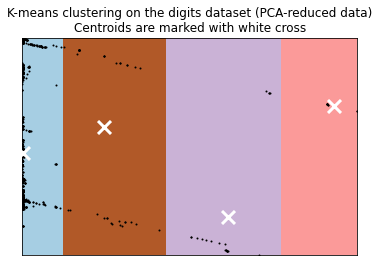

In [198]:
import matplotlib.pyplot as plt


reduced_data = PCA(n_components=2).fit_transform(df)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 9000  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [255]:
rd = pd.DataFrame(reduced_data)

In [258]:
rd['tags_02'].value_counts()

0    487068
2      6138
1      4618
3      2382
Name: tags_02, dtype: int64

In [257]:
rd['tags_02']= pd.DataFrame(kmeans.labels_)

In [266]:
predictions = kmeans.predict(reduced_data)

In [261]:
rd.groupby(rd['tags_02']).agg(['mean','std','max','min'])

0                                            \
                 mean           std           max           min   
tags_02                                                           
0       -1.100128e+07  7.150851e+06  7.437083e+07 -1.282919e+07   
1        5.244052e+08  6.465923e+07  6.719308e+08  3.421609e+08   
2        1.597610e+08  6.882713e+07  3.420209e+08  7.442085e+07   
3        8.211821e+08  7.968223e+07  9.871508e+08  6.728708e+08   

                     1                                               
                  mean            std            max            min  
tags_02                                                              
0         -1068.741217  249238.427305  726729.265482 -241508.702703  
1        -56343.210470  237390.099867  641255.997544 -232336.131386  
2        131533.342999  347469.613652  668653.552963 -210333.196145  
3        -11170.892699  314993.720197  621156.702355 -246286.201472

In [262]:
df['tags_02'] = rd['tags_02']

In [264]:
df.groupby(['tags_02']).agg({'Total':['mean','std','max','min']})

Total                             
                 mean           std       max  min
tags_02                                           
0        3.200350e-06  1.587833e-03  1.000000  0.0
1        7.313425e-08  1.007446e-06  0.000037  0.0
2        6.580299e-08  6.577446e-07  0.000029  0.0
3        8.802499e-08  1.414068e-06  0.000056  0.0

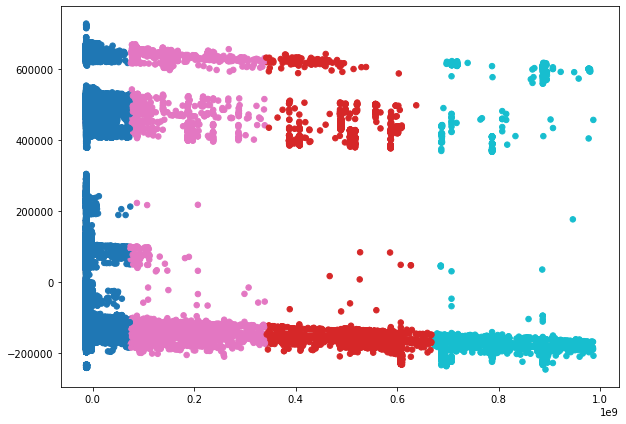

In [267]:
plt.figure(figsize=(10,7))
plt.scatter(reduced_data[:, 0],reduced_data[:, 1],c=predictions, s=30, cmap='tab10')